<a href="https://colab.research.google.com/github/Ibrahima-Ndao/AnalytiqueArrayHash/blob/main/TP_ST_BTC_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# prompt: Enlever les warning

import warnings
warnings.filterwarnings('ignore')


In [147]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Charger et examiner les donn√©es

In [148]:
start_date = "2015-01-01"
end_date = "2024-12-23"

df = yf.download('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [149]:
df.head()

Price        Adj Close       Close        High         Low        Open  \
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD     BTC-USD   
Date                                                                     
2015-01-01  314.248993  314.248993  320.434998  314.002991  320.434998   
2015-01-02  315.032013  315.032013  315.838989  313.565002  314.079010   
2015-01-03  281.082001  281.082001  315.149994  281.082001  314.846008   
2015-01-04  264.195007  264.195007  287.230011  257.612000  281.145996   
2015-01-05  274.473999  274.473999  278.341003  265.084015  265.084015   

Price         Volume  
Ticker       BTC-USD  
Date                  
2015-01-01   8036550  
2015-01-02   7860650  
2015-01-03  33054400  
2015-01-04  55629100  
2015-01-05  43962800

### Cr√©ation d'un nouveau dataset avec la variable `Close` qui est la variable observ√© dans notre s√©rie temporelle.

In [150]:
df = df['Close']

In [151]:
df.head()

Ticker         BTC-USD
Date                  
2015-01-01  314.248993
2015-01-02  315.032013
2015-01-03  281.082001
2015-01-04  264.195007
2015-01-05  274.473999

### Renommons les colonnes de notre S√©rie temporelle.

In [152]:
df.rename(columns={'Date':'Date', 'BTC-USD': 'close'}, inplace=True)

# l'objectif de notre travail consiste a mettre en place un mod√®le de pr√©diction du prix de cloture de BTC-USD en fonction du temps. Donc nous avons affaire a une s√©rie temporelle univari√©e.
- Analyse descriptive de notre variable observ√©e ['close']

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3644 entries, 2015-01-01 to 2024-12-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   3644 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [154]:
df.describe().T

count          mean           std         min          25%  \
Ticker                                                                
close   3644.0  19958.095792  21908.606604  178.102997  2573.927551   

                50%           75%            max  
Ticker                                            
close   9654.239746  31783.625488  106140.601562

### Voir les valeurs manquantes.

In [155]:
df.isnull().sum()

Ticker
close    0
dtype: int64

- Il n'existe pas de valeur manquante dans notre s√©rie temporelle

## Voir la distribution des donn√©es observ√©es

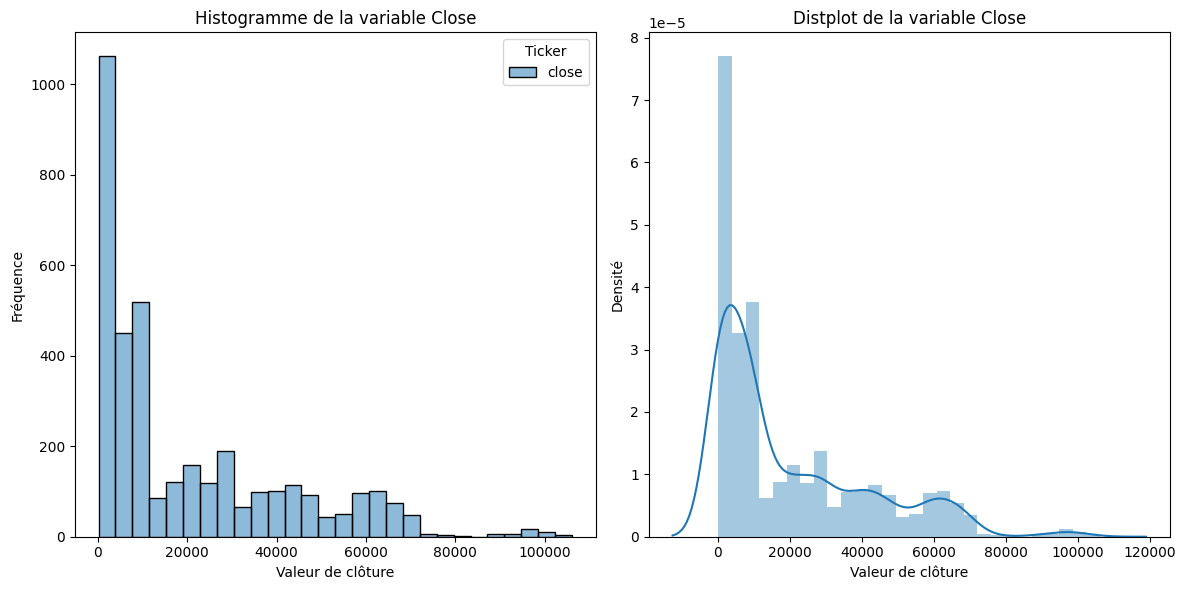

In [156]:
# prompt: fais un histogramme et un distplot bien align√© pour notre variable close

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df)
plt.title('Histogramme de la variable Close')
plt.xlabel('Valeur de cl√¥ture')
plt.ylabel('Fr√©quence')


plt.subplot(1, 2, 2)
sns.distplot(df)
plt.title('Distplot de la variable Close')
plt.xlabel('Valeur de cl√¥ture')
plt.ylabel('Densit√©')

plt.tight_layout()
plt.show()

- La repr√©sentation graphique de l'histogramme et du displot des donn√©es observ√©es de la variable Close montre que ces donn√©es ne sont pas normalement distribu√©es, c'est-√†-dire qu'elles ne suivent pas une loi normale.

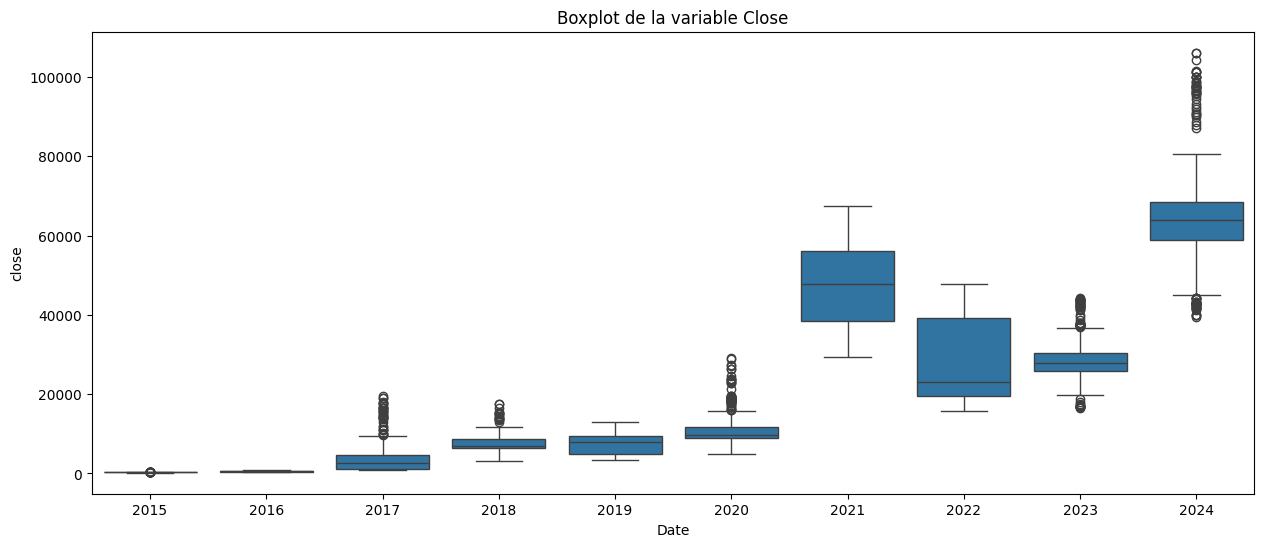

In [157]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x=df.index.year, y=df['close'], ax=ax)
ax.set_title('Boxplot de la variable Close')
plt.show()

L‚Äôanalyse des boxplots de la variable Close du BTC-USD r√©v√®le plusieurs observations importantes sur l‚Äô√©volution des prix de cl√¥ture du Bitcoin au fil des ann√©es :

Tout d‚Äôabord, on note une tendance g√©n√©rale √† la hausse des prix de cl√¥ture, particuli√®rement marqu√©e √† partir de l‚Äôann√©e 2020. Les ann√©es pr√©c√©dentes (2015-2019) pr√©sentent des niveaux de prix nettement plus bas, refl√©tant une p√©riode o√π le Bitcoin √©tait moins largement adopt√© et moins valoris√©.

La volatilit√© des prix, repr√©sent√©e par l‚Äôamplitude des bo√Ætes et des moustaches, est faible jusqu‚Äôen 2019, mais augmente significativement √† partir de 2020. Cette augmentation de volatilit√© t√©moigne d‚Äôune variation beaucoup plus importante des prix, probablement en raison d‚Äôune plus grande sp√©culation sur le march√©.

Les outliers, visibles sous forme de points situ√©s au-dessus des moustaches, sont particuli√®rement nombreux en 2017, 2020 et 2024. Ces ann√©es correspondent √† des moments o√π le prix du Bitcoin a atteint des sommets historiques, notamment lors des vagues de popularit√© croissantes ou des bulles sp√©culatives.

Certaines ann√©es cl√©s se distinguent :

- 2017 : Une premi√®re hausse notable avec une plus grande amplitude des prix, refl√©tant la premi√®re grande vague d‚Äôadoption et de sp√©culation autour du Bitcoin.
- 2020-2021 : Une forte augmentation des prix est visible, marquant une phase d‚Äôexpansion importante pour le Bitcoin. Les prix moyens ont fortement augment√©, avec une dispersion des valeurs refl√©tant une volatilit√© accrue.
- 2022 : Une stabilisation ou une l√©g√®re baisse est visible apr√®s le pic de 2021, probablement en raison d‚Äôune correction du march√© ou d‚Äô√©v√©nements externes.
- 2023-2024 : Les prix se maintiennent √† des niveaux √©lev√©s, avec une dispersion notable en 2024 qui indique encore une forte volatilit√©.
Enfin, la distribution asym√©trique des prix pour chaque ann√©e montre que les donn√©es ne suivent pas une distribution normale. Cela est coh√©rent avec le comportement souvent impr√©visible et sp√©culatif des march√©s de cryptomonnaies.

En conclusion, cette analyse met en √©vidence l‚Äô√©volution marqu√©e des prix du Bitcoin, caract√©ris√©e par des p√©riodes de forte volatilit√© et des pics importants de valorisation. Ces r√©sultats soulignent la nature dynamique et sp√©culative du march√© des cryptomonnaies, influenc√© par de nombreux facteurs √©conomiques, technologiques et sociaux.

# Visualisation de notre s√©rie temporelle. Voire l'√©volution de la variable close en fonction des dates.

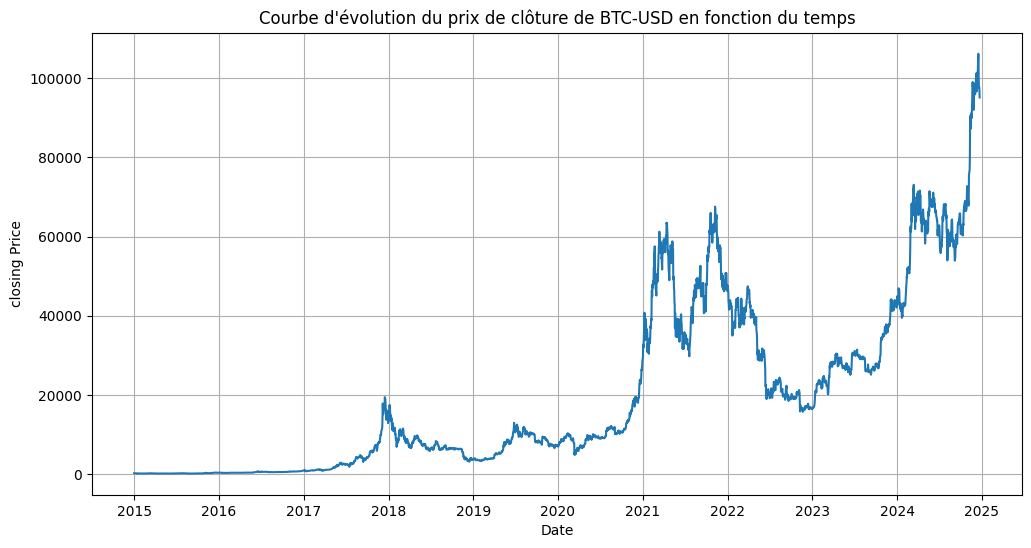

In [158]:
# prompt: Trace moi le courbe d'√©volution

# Plot the closing price of BTC-USD
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.title('Courbe d\'√©volution du prix de cl√¥ture de BTC-USD en fonction du temps')
plt.xlabel('Date')
plt.ylabel('closing Price')
plt.grid(True)
plt.show()

### La courbe montre que nous avons une tendance positive. Cela veut dire que la tendance est haussi√®re et une saisonnalit√© qui est croissante en fonction du temps. Il semble que la s√©rie temporelle n'est pas stationnaire.

---
# Faire une d√©composition additive et multiplicative pour avoir une connaissance sur notre mod√®le.

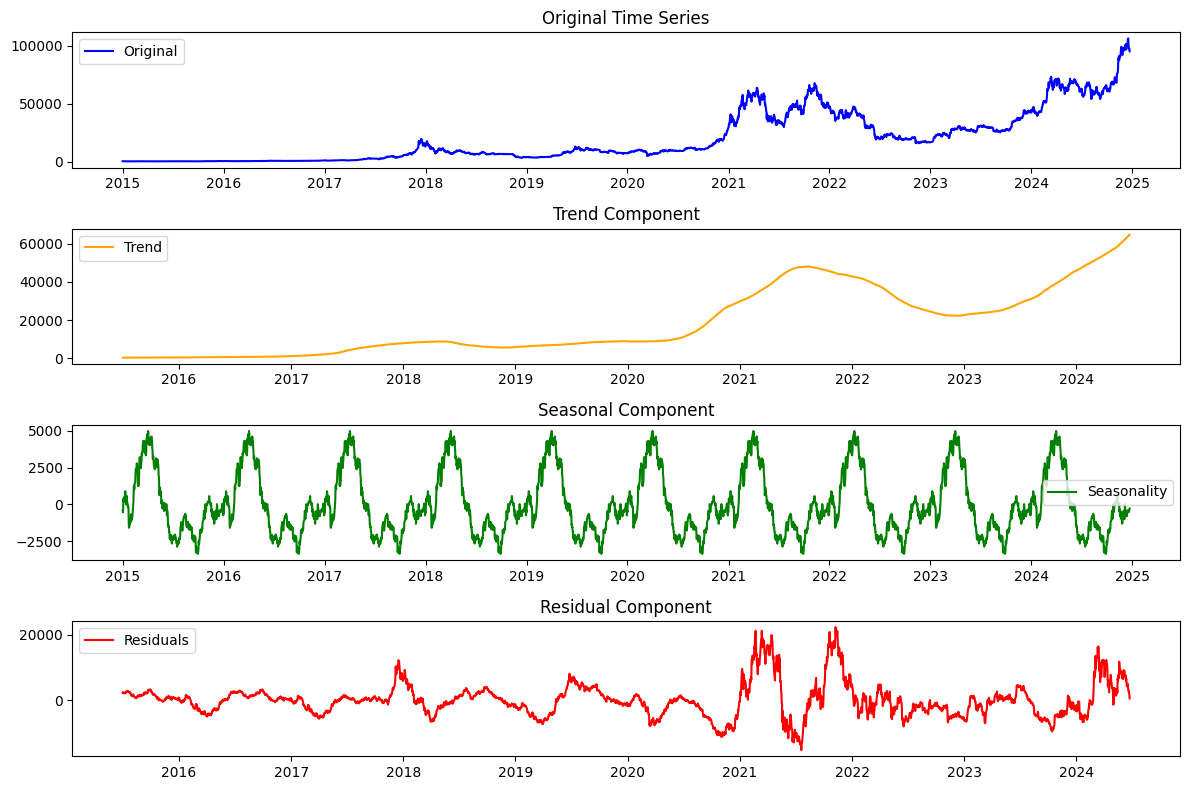

In [159]:
decomposition = seasonal_decompose(df, model='additive', period=365) # Adjust period as needed

# Store components in variables
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

- Pour la d√©composition additive, on constate une saisonnalit√© constante de 2015 √† 2025, mais une forte variation des bruits, allant de 0 √† 20 000, avec une amplitude de la courbe de variation du bruit qui augmente au fil du temps. Cela signifie qu'avec la d√©composition additive, il y a beaucoup de bruit, et que les donn√©es observ√©es ne suivent pas un sch√©ma additif.

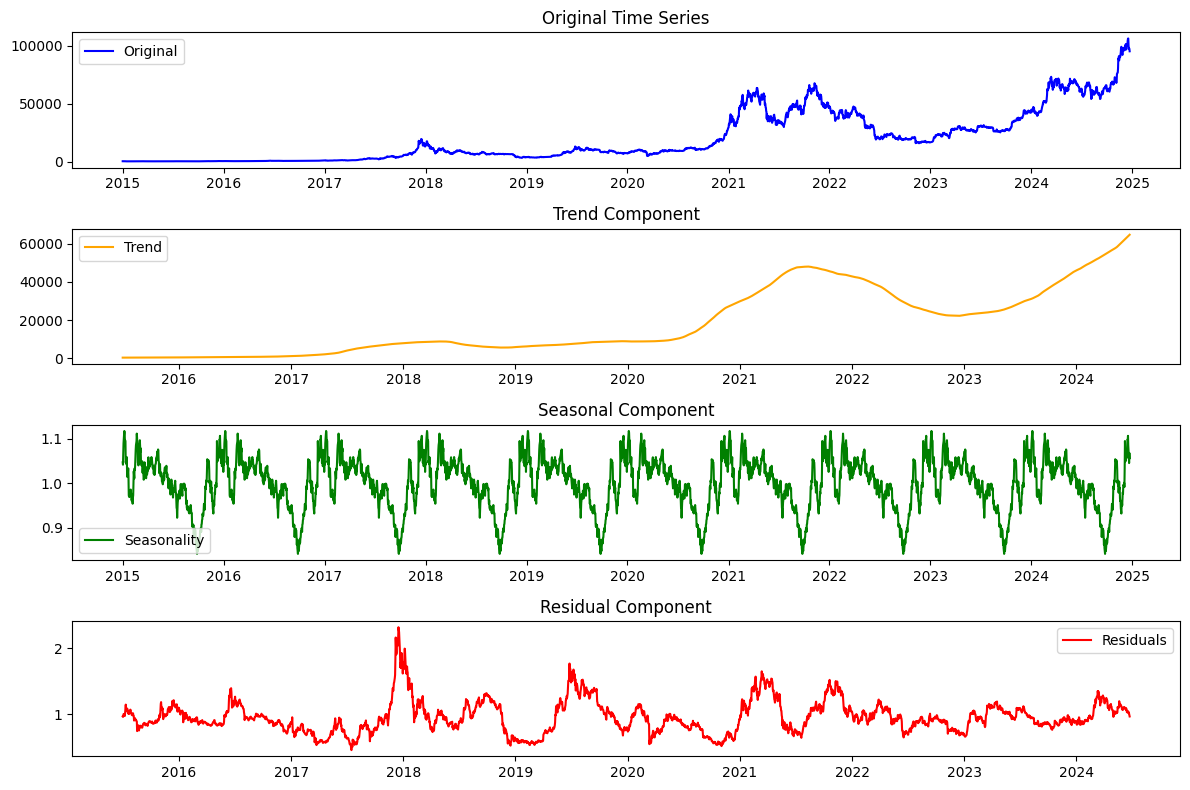

In [160]:
decomposition = seasonal_decompose(df, model='multiplicative', period=365) # Use multiplicative model

# Store components in variables
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

- Pour la d√©composition multiplicative, on constate une saisonnalit√© constante et plus condens√©e de 2015 √† 2025, accompagn√©e d'une faible variation des bruits, allant de 1 √† 2, avec une amplitude de la courbe de variation du bruit qui diminue au fil du temps. Cela signifie qu'avec la d√©composition multiplicative, le bruit est r√©duit, et que les donn√©es observ√©es suivent un sch√©ma multiplicatif, o√π la tendance et la saisonnalit√© se multiplient par rapport aux composants du bruit.
Dans ce cas, si la saisonnalit√© est constante et la variation du bruit est faible, cela sugg√®re que le mod√®le multiplicatif est adapt√©. La faible amplitude des bruits indique que l'influence des erreurs est relativement faible et que la tendance et la saisonnalit√© influencent principalement la s√©rie temporelle, en suivant un sch√©ma multiplicatif.

### Convertir les Donn√©es Multiplicatives en Additives
- Les s√©ries temporelles peuvent avoir des effets multiplicatifs entre leurs composantes (par exemple, une tendance exponentielle).
- En appliquant un logarithme, on transforme ces relations multiplicatives en relations additives, facilitant ainsi des analyses comme la d√©composition additive ou les mod√®les lin√©aires.

In [161]:
df_log = np.log(df)

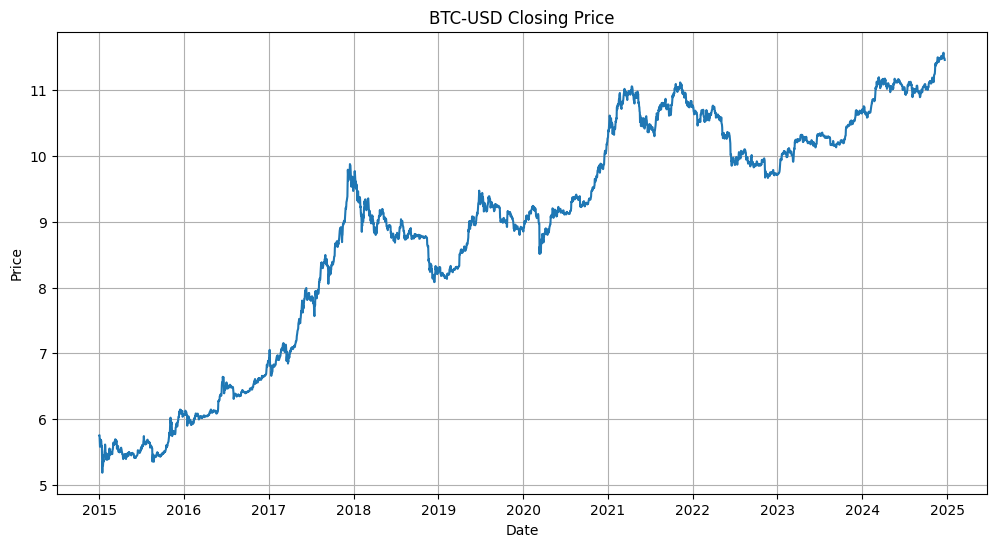

In [162]:
plt.figure(figsize=(12, 6))
plt.plot(df_log)
plt.title('BTC-USD Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### La courbe montre une r√©duction des amplitudes de variation au fil du temps, et la variance semble √™tre stabilis√©e.
- Les s√©ries temporelles financi√®res, comme les prix des actions ou des cryptomonnaies, montrent souvent une variabilit√© accrue √† mesure que les valeurs augmentent.
- En appliquant le logarithme, les grandes variations relatives (en pourcentage) sont "compress√©es", rendant la s√©rie plus homog√®ne et plus facile √† analyser.
- Une propri√©t√© essentielle pour de nombreux mod√®les de s√©ries temporelles est que la variance (ou la fluctuation) soit constante au fil du temps.
- La transformation logarithmique aide √† stabiliser la variance dans les cas o√π les amplitudes des variations augmentent avec les niveaux de la s√©rie.
- De nombreux algorithmes de mod√©lisation statistique ou machine learning, comme l'ARIMA ou les r√©gressions lin√©aires, supposent que les donn√©es sont lin√©aires ou qu'elles ont des fluctuations relativement constantes.
- Le logarithme am√©liore l'ajustement de ces mod√®les en r√©duisant les effets des valeurs extr√™mes (outliers) et des √©carts de distribution.

---
# La d√©composition des donn√©es converties (apr√®s transformation logarithmique)

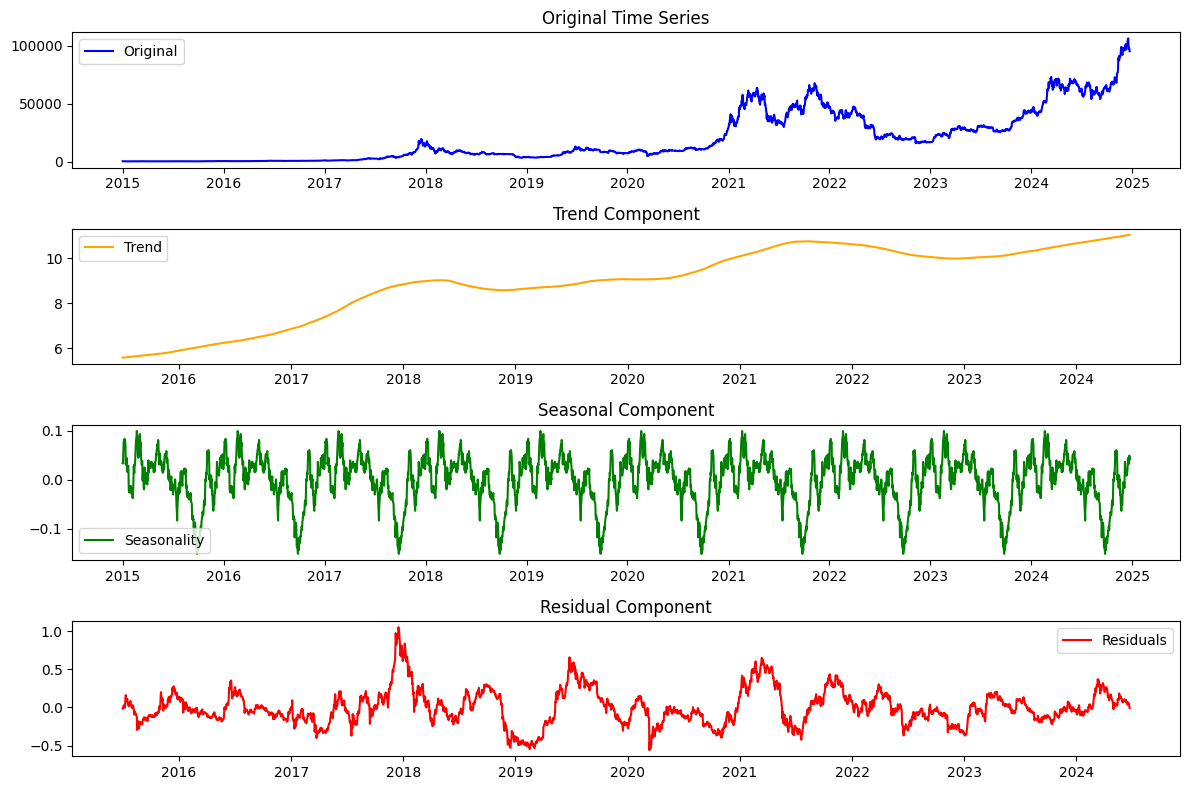

In [163]:
decomposition = seasonal_decompose(df_log, period=365) # Adjust period as needed

# Store components in variables
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Une fois les donn√©es transform√©es et d√©compos√©es, chaque composante est ajust√©e en tenant compte des effets de la transformation :
- Tendance : La tendance observ√©e est mieux liss√©e gr√¢ce √† la r√©duction des amplitudes de variation.
- Saisonnalit√© : Les variations cycliques deviennent plus homog√®nes et proportionnelles.
- R√©sidus : Les erreurs ou variations inexpliqu√©es sont mieux r√©parties, moins domin√©es par des valeurs extr√™mes, et les variations du bruit deviennent plus faibles et diminuent au fil du temps.








---
# V√©rifier si la s√©rie temporelle est stationnaire avec Le test de Dickey-Fuller augment√© (ADF).

In [164]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_log)

# Print the test results
print('Test statistique ADF :', result[0])
print('Valeur p :', result[1])
print('Nombre de retards utilis√©s :', result[2])
print('Nombre d observations utilis√©es :', result[3])
print('Valeurs critiques :')
for key, value in result[4].items():
    print('\t%s : %.3f' % (key, value))

# Interpr√©tation des r√©sultats
if result[1] < 0.05:
    print("La s√©rie est stationnaire (on rejette H0).")
else:
    print("La s√©rie n'est pas stationnaire (on accepte H0).")

Test statistique ADF : -1.0369482251902618
Valeur p : 0.7395509563375555
Nombre de retards utilis√©s : 1
Nombre d observations utilis√©es : 3642
Valeurs critiques :
	1% : -3.432
	5% : -2.862
	10% : -2.567
La s√©rie n'est pas stationnaire (on accepte H0).


---
# Application de la diff√©renciation pour rendre notre serie temporelle stationnaire.

In [165]:
# Differencing
df_diff = df_log.diff().dropna()


---
# Application du test de Dickey-Fuller augment√© (ADF) apr√®s diff√©renciation.

In [166]:
# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(df_diff)

# Print the test results for the differenced series
print('\nTest statistique ADF (apr√®s diff√©renciation) :', result_diff[0])
print('Valeur p (apr√®s diff√©renciation) :', result_diff[1])
print('Nombre de retards utilis√©s (apr√®s diff√©renciation):', result_diff[2])
print('Nombre d observations utilis√©es (apr√®s diff√©renciation):', result_diff[3])
print('Valeurs critiques (apr√®s diff√©renciation) :')
for key, value in result_diff[4].items():
    print('\t%s : %.3f' % (key, value))

# Interpr√©tation des r√©sultats apr√®s diff√©renciation
if result_diff[1] <= 0.05:
    print("\nLa valeur p est inf√©rieure √† 0.05. On rejette l'hypoth√®se nulle.")
    print("La s√©rie temporelle diff√©renci√©e est stationnaire.")
else:
    print("\nLa valeur p est sup√©rieure √† 0.05. On ne rejette pas l'hypoth√®se nulle.")
    print("La s√©rie temporelle diff√©renci√©e n'est pas stationnaire.")




Test statistique ADF (apr√®s diff√©renciation) : -61.78243320415075
Valeur p (apr√®s diff√©renciation) : 0.0
Nombre de retards utilis√©s (apr√®s diff√©renciation): 0
Nombre d observations utilis√©es (apr√®s diff√©renciation): 3642
Valeurs critiques (apr√®s diff√©renciation) :
	1% : -3.432
	5% : -2.862
	10% : -2.567

La valeur p est inf√©rieure √† 0.05. On rejette l'hypoth√®se nulle.
La s√©rie temporelle diff√©renci√©e est stationnaire.


### Donc notre s√©rie devient stationnaire apr√®s une diff√©renciation d'ordre 1
 - üëâ d = 1

---

# Visualisation de notre s√©rie stationnaire, ACF et PACF

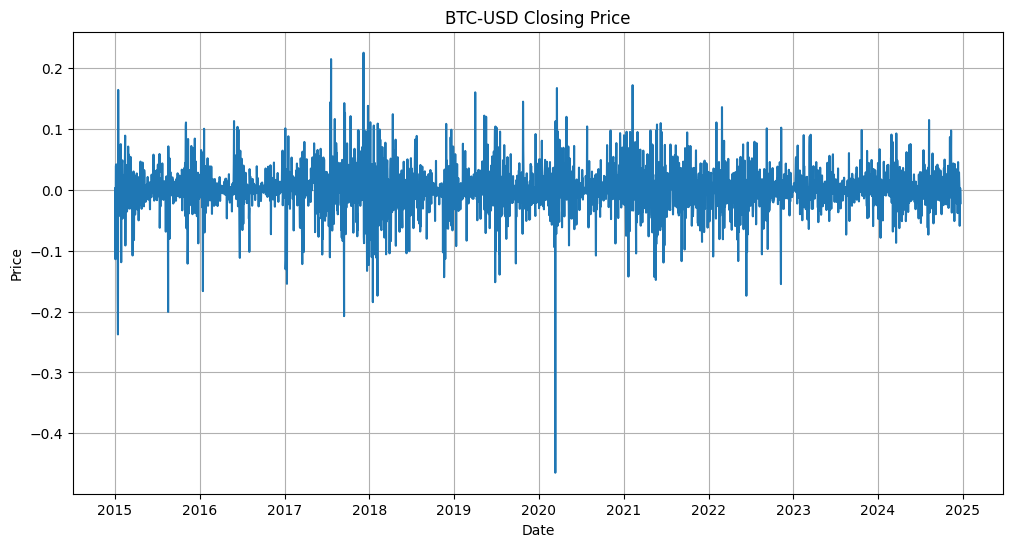

In [167]:
plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('BTC-USD Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

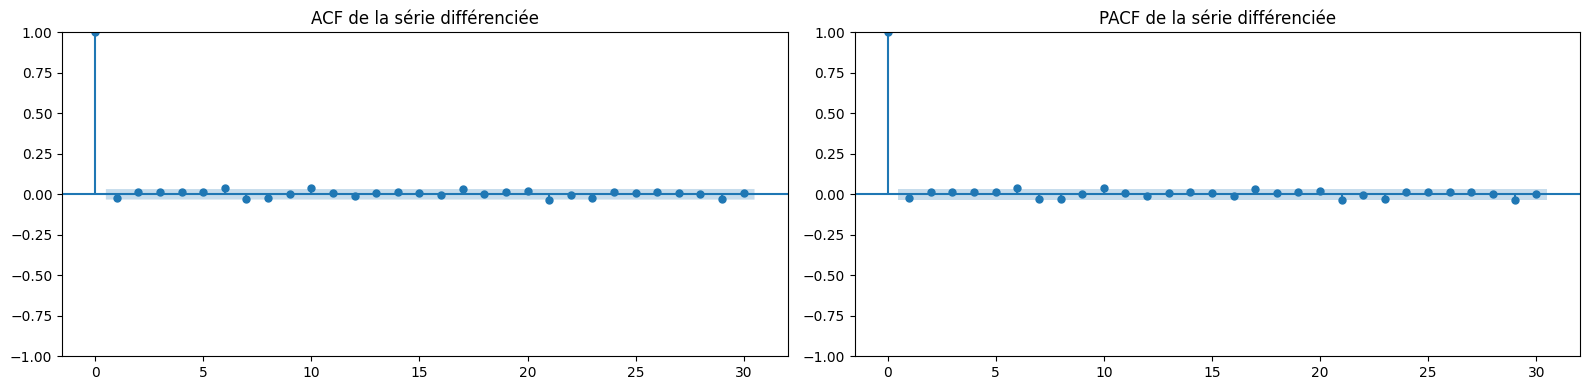

In [168]:
# prompt: fais moi ACF et PACF bien align√©

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ACF et PACF pour la s√©rie diff√©renci√©e
fig, axes = plt.subplots(1, 2, figsize=(16,4))

plot_acf(df_diff, lags=30, ax=axes[0])
axes[0].set_title('ACF de la s√©rie diff√©renci√©e')

plot_pacf(df_diff, lags=30, ax=axes[1])
axes[1].set_title('PACF de la s√©rie diff√©renci√©e')

plt.tight_layout()
plt.show()

1. Interpr√©tation de l'ACF :
- L'ACF montre une forte valeur au lag 0 (normal).
- Pour les lags suivants, les valeurs oscillent autour de z√©ro et restent dans les bandes de confiance (aucune autocorr√©lation significative).
  - üëâ ùëû = 0
2. Interpr√©tation de la PACF :
- Le PACF suit une dynamique similaire avec une coupure nette apr√®s le lag 0.
- Les valeurs des lags suivants sont faibles et non significatives.
  - üëâ ùëù = 0
3. ACF : La d√©croissance rapide vers z√©ro sans autocorr√©lation significative sugg√®re une composante MA faible (ou absente).
4. PACF : La coupure rapide apr√®s le lag 0 indique qu'il n'y a pas de structure autoregressive forte.


## Diviser les donn√©es en ensemble d'entra√Ænement et de test

In [213]:
train_data = df_log['close'][:-365]
test_data = df_log['close'][-365:]
train_data.shape[0] + test_data.shape[0] == df['close'].shape[0]

True

## # Mod√®le ARIMA (p, d, q)

In [214]:
p, d, q = 0, 1, 0  # Selon l'analyse de l'ACF et PACF

# Ajuster le mod√®le sur les donn√©es d'entra√Ænement
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
# Pr√©dictions
forecast = model_fit.forecast(steps=len(test_data))


## Afficher le r√©sum√© du mod√®le

In [215]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3279
Model:                 ARIMA(0, 1, 0)   Log Likelihood                6116.142
Date:                Mon, 30 Dec 2024   AIC                         -12230.285
Time:                        04:01:58   BIC                         -12224.190
Sample:                    01-01-2015   HQIC                        -12228.102
                         - 12-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0014   1.34e-05    104.889      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):             18669.78
Prob(Q):                              0.22   Pr

## √âvaluer la qualit√© du mod√®le

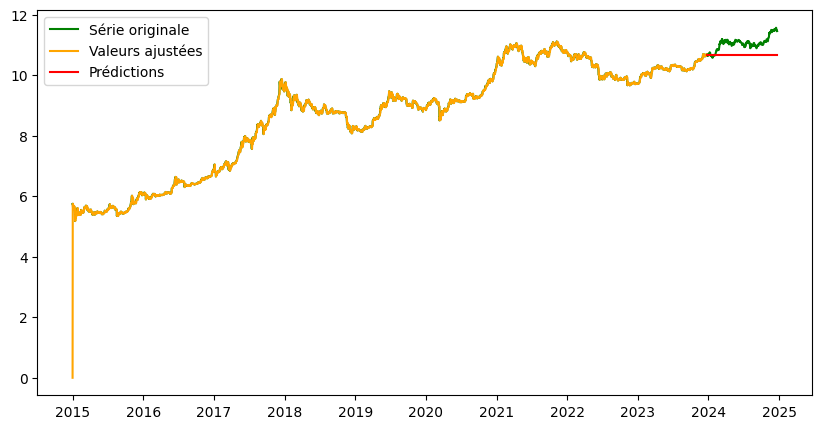

In [217]:
plt.figure(figsize=(10, 5))
plt.plot(df_log['close'], label='S√©rie originale', color= 'green')
plt.plot(model_fit.fittedvalues, label='Valeurs ajust√©es', color='orange')
plt.plot(test_data.index, forecast, label='Pr√©dictions', color='red')
plt.legend()
plt.show()

## Calculer l'erreur (MSE)

In [218]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_data, forecast)
print(f'MSE : {mse:.2f}')

MSE : 0.18


### Interpr√©tation du MSE :
- Le MSE mesure l'erreur moyenne au carr√© entre les valeurs r√©elles et les valeurs pr√©dites.
- Un MSE faible indique que les √©carts entre les pr√©dictions et les observations r√©elles sont petits.
- Dans notre cas, un MSE de 0.18 signifie que, en moyenne, les erreurs quadratiques sont tr√®s proches de z√©ro, ce qui est un signe positif pour la performance du mod√®le.

### Calculer le MAPE

In [219]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data, forecast)
print(f'MAPE : {mape:.2f}%')

MAPE : 3.36%


### Interpr√©tation du MAPE :
- Un MAPE de 3.36 % signifie que, en moyenne, les pr√©dictions du mod√®le diff√®rent des valeurs r√©elles de seulement 3.36 %.
- Cela sugg√®re que le mod√®le est bien ajust√© aux donn√©es et que les erreurs sont tr√®s faibles.

---
---

# Les M√©triques d‚Äô√âvaluation en Machine Learning

# 1. Coefficient de D√©termination (R¬≤)
## D√©finition :

Le coefficient de d√©termination (¬†R¬≤¬†) mesure la proportion de la variance des donn√©es r√©elles expliqu√©e par le mod√®le.

## Formule :
$
R¬≤ = 1 - \frac{\sum{(y_i - \hat{y}_i)^2}}{\sum{(y_i - \bar{y})^2}}
$
- $ y_i $ : Valeurs r√©elles.  
- $ \hat{y}_i $ : Valeurs pr√©dites.  
- $ \bar{y} $ : Moyenne des valeurs r√©elles.  

## Interpr√©tation :
Repr√©sente la proportion de la variance expliqu√©e par le mod√®le.
- $ R¬≤ \in [0, 1] $ (peut √™tre n√©gatif si le mod√®le est pire qu'une pr√©diction constante).  
  - **1** : Mod√®le parfait.  
  - **0** : Le mod√®le est aussi bon que la moyenne.  
  - **< 0** : Le mod√®le est pire qu'une pr√©diction bas√©e sur la moyenne.  


## Avantages :
- Intuitif pour mesurer la qualit√© de l‚Äôajustement.  
- Bonne mesure globale de performance.


## Inconv√©nients :
- Insensible aux biais syst√©matiques.  
- Peut √™tre trompeur si utilis√© seul.


---

# 2. Mean Squared Error (MSE)
## D√©finition :

Le MSE calcule la moyenne des carr√©s des erreurs entre les pr√©dictions et les valeurs r√©elles.

## Formule :
$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$
- $ y_i $: Valeurs r√©elles.  
- $ \hat{y}_i $: Valeurs pr√©dites.  
- $ n$ : Nombre de donn√©es.  

La MSE repr√©sente la moyenne des carr√©s des erreurs.

## Interpr√©tation :
- P√©nalise fortement les grandes erreurs (√† cause de l'√©l√©vation au carr√©).  
- Plus le MSE est faible, meilleur est le mod√®le.

## Avantages :
- Sensible aux grandes erreurs, ce qui est utile pour d√©tecter des anomalies.  
- Math√©matiquement pratique (facilement d√©rivable pour optimiser).

## Inconv√©nients :
- Sensibilit√© excessive aux grandes erreurs.  
- Peu interpr√©table (n'est pas dans la m√™me unit√© que les donn√©es).


---

# 3. Mean Absolute Error (MAE)
## D√©finition :

Le MAE calcule la moyenne des erreurs absolues entre les pr√©dictions et les valeurs r√©elles.

## Formule :
$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$
- $ y_i $ : Valeurs r√©elles.  
- $ \hat{y}_i $ : Valeurs pr√©dites.  
- $ n $ : Nombre de donn√©es.  

La MAE repr√©sente la moyenne des erreurs absolues.

## Interpr√©tation :
Indique l‚Äôerreur moyenne absolue entre les pr√©dictions et les observations.  

## Avantages :
- Facile √† interpr√©ter (dans la m√™me unit√© que les donn√©es).  
- Moins sensible aux grandes erreurs.  

## Inconv√©nients :
- Ne diff√©rencie pas les petites et grandes erreurs de mani√®re significative.  
- Moins utile si les grandes erreurs doivent √™tre p√©nalis√©es.


---

# 4. Mean Absolute Percentage Error (MAPE)
## D√©finition :

Le MAPE mesure l‚Äôerreur moyenne absolue en pourcentage des valeurs r√©elles.

## Formule :
$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right| \times 100
$
- $ y_i $: Valeurs r√©elles.  
- $ \hat{y}_i $: Valeurs pr√©dites.  
- $ n$ : Nombre de donn√©es.  

La MAPE mesure l‚Äôerreur moyenne absolue en pourcentage des valeurs r√©elles.

## Interpr√©tation :
- Mesure l‚Äôerreur moyenne absolue en pourcentage des valeurs r√©elles.  
- Utile pour comparer des mod√®les sur des s√©ries avec des √©chelles diff√©rentes.

## Avantages :
- Ind√©pendant des unit√©s.  
- Intuitif pour exprimer les erreurs en pourcentage.

## Inconv√©nients :
- Ne fonctionne pas si $ y_i = 0 $.  
- Biais√© pour les petites valeurs de $ y_i $.


---

# 5. Root Mean Squared Error (RMSE)
## D√©finition :

Le RMSE est la racine carr√©e du MSE, ce qui ram√®ne l‚Äôerreur √† la m√™me √©chelle que les donn√©es.

## Formule :
$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$
- $ y_i $: Valeurs r√©elles.  
- $ \hat{y}_i $: Valeurs pr√©dites.  
- $ n $: Nombre de donn√©es.  

La RMSE est la racine carr√©e du MSE, ramenant l'erreur √† l'√©chelle des donn√©es.

## Interpr√©tation :
- La RMSE mesure l'√©cart-type des r√©sidus, c'est-√†-dire la racine carr√©e du MSE, ce qui permet de revenir √† l'√©chelle des donn√©es.

## Avantages :
- Facilement interpr√©table (dans la m√™me unit√© que les donn√©es).  
- P√©nalise les grandes erreurs de mani√®re mod√©r√©e.

## Inconv√©nients :
- Comme le MSE, il est sensible aux grandes erreurs.


---

# R√©sum√© Comparatif des M√©triques

| **M√©trique** | **Aspect Math√©matique** | **Avantages** | **Inconv√©nients** |
|--------------|-------------------------|---------------|-------------------|
| **R¬≤**       | Variance expliqu√©e       | Facile √† interpr√©ter globalement | Insensible aux biais, limit√© en cas de non-lin√©arit√© |
| **MSE**      | Carr√© des erreurs        | P√©nalise les grandes erreurs, utile en optimisation | Moins interpr√©table, sensible aux outliers |
| **MAE**      | Moyenne des erreurs absolues | Interpr√©table, robuste aux outliers | Moins sensible aux grandes erreurs |
| **MAPE**     | Erreur relative (%)      | Ind√©pendant des unit√©s, intuitif | Impossible √† utiliser si \( y_i = 0 \) |
| **RMSE**     | Racine du MSE            | Combinaison de sensibilit√© et d'interpr√©tabilit√© | Sensible aux outliers |


---

# Choix de la M√©trique

- **R¬≤** : √âvaluation globale de l'ajustement du mod√®le. Utile pour obtenir une vue d'ensemble de la capacit√© du mod√®le √† expliquer la variance des donn√©es.
  
- **MSE** : √Ä privil√©gier si les grandes erreurs doivent √™tre fortement p√©nalis√©es, car cette m√©trique met l'accent sur les erreurs importantes (en raison du carr√©).

- **MAE** : √Ä utiliser lorsque les grandes erreurs ne sont pas critiques. C‚Äôest une m√©trique robuste aux erreurs extr√™mes et facile √† interpr√©ter, mais elle ne diff√©rencie pas les erreurs petites et grandes de mani√®re significative.

- **MAPE** : Id√©ale lorsque les √©chelles ou unit√©s des donn√©es varient, ou pour exprimer des erreurs en pourcentage. Elle permet de comparer des mod√®les sur des donn√©es de diff√©rentes √©chelles.

- **RMSE** : Un bon compromis entre sensibilit√© aux grandes erreurs et interpr√©tabilit√©, en ramenant l'erreur √† l'√©chelle des donn√©es. Utile lorsque l'on veut un compromis entre p√©nalisation des erreurs et lisibilit√© de l'√©chelle.

Chaque m√©trique est utile dans des contextes diff√©rents. Le choix de la m√©trique d√©pend de la nature des donn√©es, des objectifs du projet et des contraintes sp√©cifiques.
